In [409]:
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report
import h5py
%matplotlib inline

<b>Read the .h5 file and assign to a variable.

In [352]:
data = h5py.File("Autonomous_Vehicles_SVHN_single_grey1.h5", "r")

<b>Print all the keys from the .h5 file.

In [353]:
print("Keys: %s" % data.keys())

Keys: <KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


<b>Split the data into X_train, X_test, Y_train, Y_test

In [354]:
# Load the datasets
x_train = data['X_train'][:]
x_val = data['X_val'][:]
x_test = data['X_test'][:]
y_train = data['y_train'][:]
y_val = data['y_val'][:]
y_test = data['y_test'][:]
data.close()

<b>Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.

In [355]:
print('Shape of x-train', x_train.shape, '\nShape of y-train', y_train.shape,
      '\n\nShape of x-test', x_test.shape, '\nShape of y-test', y_test.shape,
      '\n\nShape of x-val', x_val.shape, '\nShape of y-val', y_val.shape,)

Shape of x-train (42000, 32, 32) 
Shape of y-train (42000,) 

Shape of x-test (18000, 32, 32) 
Shape of y-test (18000,) 

Shape of x-val (60000, 32, 32) 
Shape of y-val (60000,)


<b>Visualise first 10 images in train data and print its corresponding labels.

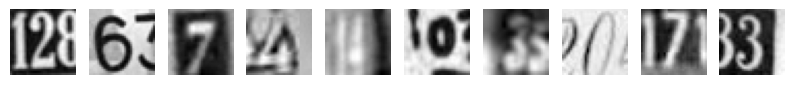

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [356]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

<b>Reshape all the images with appropriate shape update the data in same variable.

In [357]:
image_vector_size = 32*32
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)
x_val = x_val.reshape(x_val.shape[0], image_vector_size)

<b>Normalise the images i.e. Normalise the pixel values.

In [358]:
x_train = x_train / 255.0
x_test = x_test / 255.0

<b>Transform Labels into format acceptable by Neural Network

In [359]:
np.unique(np.concatenate([y_train, y_test, y_val]))
#so there are 10 different classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [360]:
num_classes = 10
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)
y_val_cat = tf.keras.utils.to_categorical(y_val, num_classes)

In [362]:
print("First 5 training lables as one-hot encoded vectors:\n", y_train_cat[:5])

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


<b>Print total Number of classes in the Dataset.

In [363]:
np.unique(np.concatenate([y_train, y_test, y_val]))
#so there are 10 different classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

<b>Design a Neural Network to train a classifier.

In [918]:
#to clear all the sessions
tf.keras.backend.clear_session()

#Fixing the seed for random |number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [925]:
# create model
model_1 = Sequential()  

model_1.add(Dense(500, activation='relu',input_shape=(32*32,)))


model_1.add(Dense(500, activation='relu', kernel_initializer='he_normal'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.4))


model_1.add(Dense(500, activation='relu', kernel_initializer='he_normal'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.4))


model_1.add(Dense(500, activation='relu', kernel_initializer='he_normal'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.4))

model_1.add(Dense(10, activation='softmax'))

# Compile model
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model_1.compile( loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
#model_1.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy']) ### Loss function = Categorical cross entropy


# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs')
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

c:\Users\charansakki\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [926]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 500)            │       512,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 500)            │         2,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 500)            │         2,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 500)            │         2,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,275,010 (4.86 MB)

 Trainable params: 1,272,010 (4.85 MB)

 Non-trainable params: 3,000 (11.72 KB)

<b>Train the classifier using previously designed Architecture (Use best suitable parameters).

In [927]:
# Fit the model
history = model_1.fit(x_train, y_train_cat, validation_data=(x_val, y_val_cat), epochs=50, batch_size=64, verbose=1, callbacks=[early_stopping, model_checkpoint, tensorboard, reduce_lr])
#model_1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64, verbose=1, callbacks=[early_stopping])

Epoch 1/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1345 - loss: 2.8127 - val_accuracy: 0.1737 - val_loss: 476.6674 - learning_rate: 0.0010
Epoch 2/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4561 - loss: 1.5866 - val_accuracy: 0.4318 - val_loss: 162.9678 - learning_rate: 0.0010
Epoch 3/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5909 - loss: 1.2769 - val_accuracy: 0.5544 - val_loss: 86.4171 - learning_rate: 0.0010
Epoch 4/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6453 - loss: 1.1285 - val_accuracy: 0.6121 - val_loss: 74.3093 - learning_rate: 0.0010
Epoch 5/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6676 - loss: 1.0635 - val_accuracy: 0.6493 - val_loss: 58.6057 - learning_rate: 0.0010
Epoch 6/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6813 - loss: 1.0201 - val_accuracy: 0.6661 - val_loss: 47.1891 - learning_rate: 0.0010
Epoch 7/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6874 - loss: 0

<b>Evaluate performance of the model with appropriate metrics.

In [928]:
# predicting the model on test data
y_pred=model_1.predict(x_test)

# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_final=[]
for i in y_pred:
  y_pred_final.append(np.argmax(i))

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


In [929]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1814
           1       0.80      0.86      0.83      1828
           2       0.85      0.84      0.84      1803
           3       0.80      0.77      0.78      1719
           4       0.82      0.87      0.84      1812
           5       0.79      0.80      0.79      1768
           6       0.80      0.83      0.81      1832
           7       0.85      0.85      0.85      1808
           8       0.83      0.75      0.79      1812
           9       0.83      0.79      0.81      1804

    accuracy                           0.82     18000
   macro avg       0.82      0.82      0.82     18000
weighted avg       0.82      0.82      0.82     18000



<b>Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

In [930]:
hist  = pd.DataFrame(history.history)

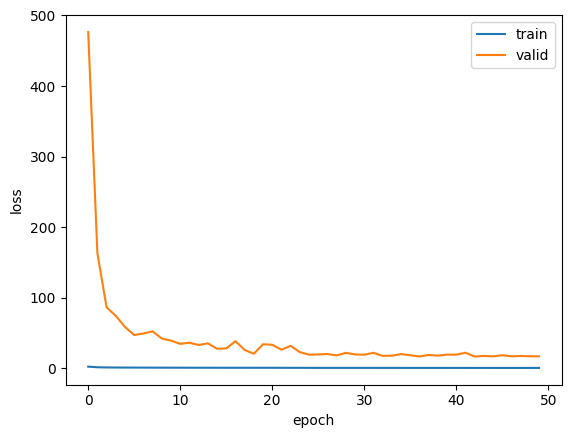

In [931]:
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(("train" , "valid"))

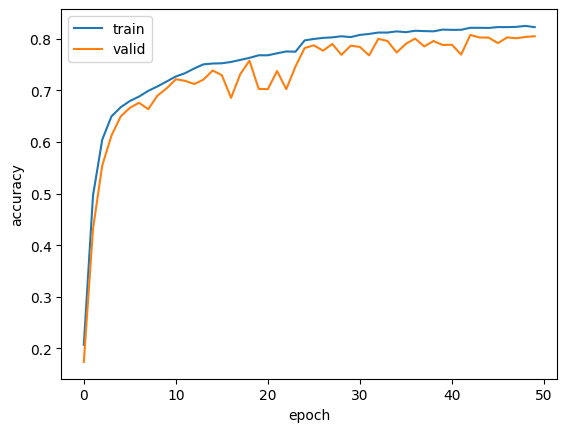

In [932]:
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(("train" , "valid"))

#### Observations:

* Loss:

The training loss curve (blue) shows a significant drop in the initial epochs, likely due to the model learning the easier patterns in the data.
The validation loss curve (orange) also decreases initially but plateaus around epoch 20, indicating that the model is starting to overfit to the training data.
* Accuracy:

The training accuracy curve (blue) steadily increases, reaching a plateau around epoch 40.
The validation accuracy curve (orange) also increases but starts to diverge from the training curve around epoch 20, confirming the overfitting behavior observed in the loss curves.
#### Insights:

* The model appears to be learning effectively from the training data in the initial epochs, as evidenced by the decrease in both training and validation loss.
* However, the model starts to overfit around epoch 20, as the validation loss plateaus and even starts to increase slightly while the training loss continues to decrease. This suggests that the model is memorizing the training data rather than learning generalizable patterns.
* The accuracy curves corroborate the overfitting behavior. The training accuracy continues to improve, but the validation accuracy plateaus and even starts to decline, indicating that the model is not performing as well on unseen data.

#### Additional Considerations:

* The specific values on the y-axis (loss and accuracy) would be helpful for a more quantitative analysis.
* Understanding the dataset size and complexity would provide additional context for interpreting the results.
* It would be beneficial to compare these curves to those obtained with different models or training configurations to assess the model's performance relative to others.